In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import MisrToolkit as mtk # needs python3.6
# from mpl_toolkits.basemap import Basemap # needs python 3.8?
import sys # to check python version
import os
import glob
import datetime as dt

In [2]:
# if (old_trainig_ds == 'on'):

def rename_oldDS_columns(in_transect):
    # rename columns
    if (in_transect.iloc[:,5].name == ' firstLat'):
        in_transect.rename(columns={'#path':'path', ' orbit':'orbit', ' img_block':'block',\
                             ' line':'line', ' sample':'sample',\
                            ' firstLat':'lat', ' firstLon':'lon',\
                            ' rms':'mean_ATM_roughness'}, inplace=True)
    
    
    if (in_transect.iloc[:,5].name == ' lat'):
        in_transect.rename(columns={'#path':'path', ' orbit':'orbit', ' img_block':'block',\
                                     ' line':'line', ' sample':'sample',\
                                    ' lat':'lat', ' lon':'lon',\
                                    ' rms':'mean_ATM_roughness'}, inplace=True)

    print(in_transect.columns)
    
    return 0
    

In [3]:
def plot_error_mesh(subtract_error_2d):
    
    import matplotlib.pyplot as plt

    color_map = plt.imshow(subtract_error_2d)
    # color_map.set_cmap("OrRd")
    # color_map.set_cmap("Greys")
    # color_map.set_cmap("YlOrBr")
    # color_map.set_cmap("gist_yarg")
#     color_map.set_cmap("binary") 
    color_map.set_cmap("bwr")
    # color_map.set_cmap("Blues")

    plt.colorbar()

    plt.show()

    return 0

# ref: https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [4]:
# from matplotlib import image as pltimg, pyplot as plt  #  pyplot uses the actual RGB values as they are, more accurate than PIL

def plot_here_and_write(in_arr, img_dir):
    write_mode = 0
#     img_label = 'path_'+path_num+'_'+'blocks_'+str(start_block)+'_'+str(end_block)+'_cam_'+cam
    img_format = ".jpg"
    %matplotlib inline 

    plt.gray() # This will show the images in grayscale as default

    plt.figure(figsize=(30,30))  # set the figure size

    plt.imshow(in_arr)
    plt.show()
    
    if (write_mode):
        print('save mode: on, we write images to disc')
        
        out_img = img_label+img_format
        out_img_fullpath = os.path.join(img_dir, out_img)
        print("-> output img is: %s" %out_img_fullpath)
        pltimg.imsave(out_img_fullpath, in_arr)
        #     plt.savefig(out_img)
    
    return 0

In [5]:
def remove_negatives(in_df, column_label):
    # remove negative values from DF

    index_list = in_df.loc[in_df[column_label] < 0].index
    print("size of list before removing negative MISR-rough data: %s" %len(in_df))

    in_df.drop(index_list, axis='index', inplace=True)
    print("size of list after removing negative MISR-rough data: %s" %len(in_df))
    
    return 0 # changes are inplace

In [6]:
sim_month = 'April 2016'

## path to roughness files

In [7]:
# roughness_dir = '/Volumes/Ehsan-7757225325/2016/july_2016/all_roughness_subdirs_1_to_16_july2016'

# roughness_dir = '/Volumes/SEAGATE/april_2016/roughness_apr2016_from_PH'
roughness_dir = "/Volumes/SEAGATE/roughness_test_p104_o86919_b23"

In [8]:
os.path.isdir(roughness_dir)

True

## path to training dataset


In [11]:
# trainingDS_dir = "/Volumes/SEAGATE/april_2016/"
# trainingDS_dir = '/Users/ehsanmos/MLP_dataset/july_2016'
trainingDS_dir = "/Volumes/SEAGATE/roughness_test_p104_o86919_b23"

trainingDS_csv = "atmmodelDS_from_p104_o86919_april2016.csv"
# trainingDS_csv = "atmmodel_april_2016.csv"
# trainingDS_csv = "atmmodel_july_2016_1to16.csv"

In [12]:
# open/read input dataset

atm_trainigDS_fp = os.path.join(trainingDS_dir, trainingDS_csv)
os.path.isfile(atm_trainigDS_fp)

True

In [13]:
atm_transect = pd.read_csv(atm_trainigDS_fp)

In [14]:
atm_transect.shape

(812, 15)

In [15]:
atm_transect.columns[0]

'#path'

In [16]:
if (atm_transect.columns[0] == '#path'):
    rename_oldDS_columns(atm_transect)

Index(['path', 'orbit', 'block', 'line', 'sample', 'lat', 'lon', ' an', ' ca',
       ' cf', 'mean_ATM_roughness', ' weight', ' npts', ' cloud', ' var'],
      dtype='object')


In [17]:
# info of path-orbit-block and then select absed on this info

# atm_transect['path'].value_counts()

In [18]:
# atm_transect['orbit'].value_counts()

In [19]:
# atm_transect['block'].value_counts()

### ==========================================================================

## we need cloud mask here to make sure the block is not cloudy

how examine a MISR block is not cloudy? we can open HDF file and check some things in it, 
we need a mask flag (dataset) here to open and check the flag and determine if the block 
is cloudy or not, and then we can decide to use it or not here!

we should run an algorithm on images and determine cloudiness ration/percent/probability 
in each MISR image and then we can write the % or ratio in a seperate dataset for each POB.


### ==========================================================================

In [20]:
# select POB to extract
# note: we selected an arbiterary POB as following 
# Arbitrary POB

selected_path = 104
selected_orbit = 86919
selected_block = 23


In [21]:
atm_transect.columns

Index(['path', 'orbit', 'block', 'line', 'sample', 'lat', 'lon', ' an', ' ca',
       ' cf', 'mean_ATM_roughness', ' weight', ' npts', ' cloud', ' var'],
      dtype='object')

In [22]:
# remove zeros

filter_zeros_cond = (atm_transect['path']==0) & (atm_transect['orbit']==0) & (atm_transect['block']==0)

zero_index_list = atm_transect.index[filter_zeros_cond].tolist()
print('number of zeros found in DS: %s' %len(zero_index_list))

atm_transect.drop(labels=zero_index_list, axis=0, inplace=True)
atm_transect.head()

number of zeros found in DS: 0


,path,orbit,block,line,sample,lat,lon,an,ca,cf,mean_ATM_roughness,weight,npts,cloud,var
0,104,86919,23,0,1198,80.252996,205.430277,0.758047,0.893508,0.979357,12.507500,0.5,4.0,-1,2.334661
1,104,86919,23,0,1199,80.250932,205.423978,0.755615,0.899588,0.976682,9.070000,0.5,1.0,-1,0.050000
2,104,86919,23,1,1199,80.250417,205.422400,0.757804,0.900804,0.976925,13.668182,0.5,5.5,-1,2.516534
3,104,86919,23,2,1199,80.247579,205.413754,0.758534,0.903236,0.982032,13.045000,0.5,1.0,-1,0.575000
4,104,86919,23,2,1200,80.247062,205.412192,0.757075,0.897643,0.986167,9.400000,0.5,4.0,-1,1.387245


In [23]:
atm_transect.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812 entries, 0 to 811
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   path                812 non-null    int64  
 1   orbit               812 non-null    int64  
 2   block               812 non-null    int64  
 3   line                812 non-null    int64  
 4   sample              812 non-null    int64  
 5   lat                 812 non-null    float64
 6   lon                 812 non-null    float64
 7    an                 812 non-null    float64
 8    ca                 812 non-null    float64
 9    cf                 812 non-null    float64
 10  mean_ATM_roughness  812 non-null    float64
 11   weight             812 non-null    float64
 12   npts               812 non-null    float64
 13   cloud              812 non-null    int64  
 14   var                812 non-null    float64
dtypes: float64(9), int64(6)
memory usage: 101.5 KB


In [24]:
# # delete the first column

# atm_transect_small.drop(labels='Unnamed: 0', axis=1, inplace=True)
# atm_transect_small.columns

In [25]:
# change dtype of columns to int

atm_transect = atm_transect.astype({'path':int, 'orbit':int, 'block':int, 'line':int, 'sample':int})
atm_transect.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812 entries, 0 to 811
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   path                812 non-null    int64  
 1   orbit               812 non-null    int64  
 2   block               812 non-null    int64  
 3   line                812 non-null    int64  
 4   sample              812 non-null    int64  
 5   lat                 812 non-null    float64
 6   lon                 812 non-null    float64
 7    an                 812 non-null    float64
 8    ca                 812 non-null    float64
 9    cf                 812 non-null    float64
 10  mean_ATM_roughness  812 non-null    float64
 11   weight             812 non-null    float64
 12   npts               812 non-null    float64
 13   cloud              812 non-null    int64  
 14   var                812 non-null    float64
dtypes: float64(9), int64(6)
memory usage: 101.5 KB


In [26]:
# set filters to select a MISR block from ATM dataset

path_filter = (atm_transect['path']==selected_path)
orbit_filter = (atm_transect['orbit']==selected_orbit)
block_filter = (atm_transect['block']==selected_block)

atm_transect_in_block = atm_transect.loc[path_filter & orbit_filter & block_filter]
print('Shape of our dataset after filtering for our target block... (%s, %s)' %atm_transect_in_block.shape)
atm_transect_in_block.head()


Shape of our dataset after filtering for our target block... (812, 15)


,path,orbit,block,line,sample,lat,lon,an,ca,cf,mean_ATM_roughness,weight,npts,cloud,var
0,104,86919,23,0,1198,80.252996,205.430277,0.758047,0.893508,0.979357,12.507500,0.5,4.0,-1,2.334661
1,104,86919,23,0,1199,80.250932,205.423978,0.755615,0.899588,0.976682,9.070000,0.5,1.0,-1,0.050000
2,104,86919,23,1,1199,80.250417,205.422400,0.757804,0.900804,0.976925,13.668182,0.5,5.5,-1,2.516534
3,104,86919,23,2,1199,80.247579,205.413754,0.758534,0.903236,0.982032,13.045000,0.5,1.0,-1,0.575000
4,104,86919,23,2,1200,80.247062,205.412192,0.757075,0.897643,0.986167,9.400000,0.5,4.0,-1,1.387245


## write out

In [27]:
# # write some portion of it

# sample_df = atm_transect_in_block.head(20)
# sample_df.to_csv(os.path.join(trainingDS_dir, 'atmmodel_april_2016_smallDS.csv'), index=False)

## change max step

In [28]:
# maybe if we want to select a smaller subset of the selected transect, like the first 100 points (or 10)

# max_step = 100
max_step = atm_transect_in_block.shape[0]

atm_transect_in_block = atm_transect_in_block.iloc[0:max_step]

In [29]:
atm_transect_in_block.shape

(812, 15)

In [30]:
# sort by column ("line")

# atm_transect_in_block.sort_values(by='line', axis=0, inplace=True) # axis=0 == column names
# atm_transect_in_block.head(50)


In [31]:
# check for duplicates in rows of dataset




In [32]:
# zfill() path and string it

if selected_path < 100:
    path_str = str(selected_path).zfill(3)
else:
    path_str = str(selected_path)


# zfill() block and string it
if selected_block < 10:
    block_str = str(selected_block).zfill(2)
else:
    block_str = str(selected_block)

In [33]:
#- find roughness file from pattern of roughness.dat file

roughness_file_pattern = "roughness_toa_refl_P"+path_str+"_O0"+str(selected_orbit)+"_B0"+block_str+".dat"
print('looking for pattern: %s' %roughness_file_pattern)

# find roughness file
rough_file_list = glob.glob(os.path.join(roughness_dir, roughness_file_pattern))
print('found:')
print(rough_file_list)

if (len(rough_file_list) < 1):
    raise ValueError("roughness list came out empty!")

if (len(rough_file_list) > 1):
    raise ValueError("roughness list has more that 1 file! there should be an error in our logic!")

looking for pattern: roughness_toa_refl_P104_O086919_B023.dat
found:
['/Volumes/SEAGATE/roughness_test_p104_o86919_b23/roughness_toa_refl_P104_O086919_B023.dat']


In [34]:
# open roughness binary file and change binary to array

misr_rough_2d_arr = np.fromfile(rough_file_list[0], dtype=np.double)[0:1048576].reshape((512,-1))
print(misr_rough_2d_arr.shape)

(512, 2048)


In [35]:
# extract lat lon arrays

misr_lat_2d_arr = np.fromfile(rough_file_list[0], dtype=np.double)[1048576:2097152].reshape((512,-1))
print(misr_lat_2d_arr.dtype)
print(misr_lat_2d_arr.shape)

misr_lon_2d_arr = np.fromfile(rough_file_list[0], dtype=np.double)[2097152:3145728].reshape((512,-1))
# print(misr_lon_2d_arr)


float64
(512, 2048)


In [36]:
# check value for sample lat-lon

for end_black in range(misr_rough_2d_arr.shape[1]):
    if misr_rough_2d_arr[0, end_black] > 0:
        print(end_black)
        break

381


In [37]:
print(misr_rough_2d_arr[0, end_black-10])
print(misr_lat_2d_arr[0, end_black-10])
print(misr_lon_2d_arr[0, end_black-10])

-1.0
82.01932323363577
-161.18107022671583


<Figure size 432x288 with 0 Axes>

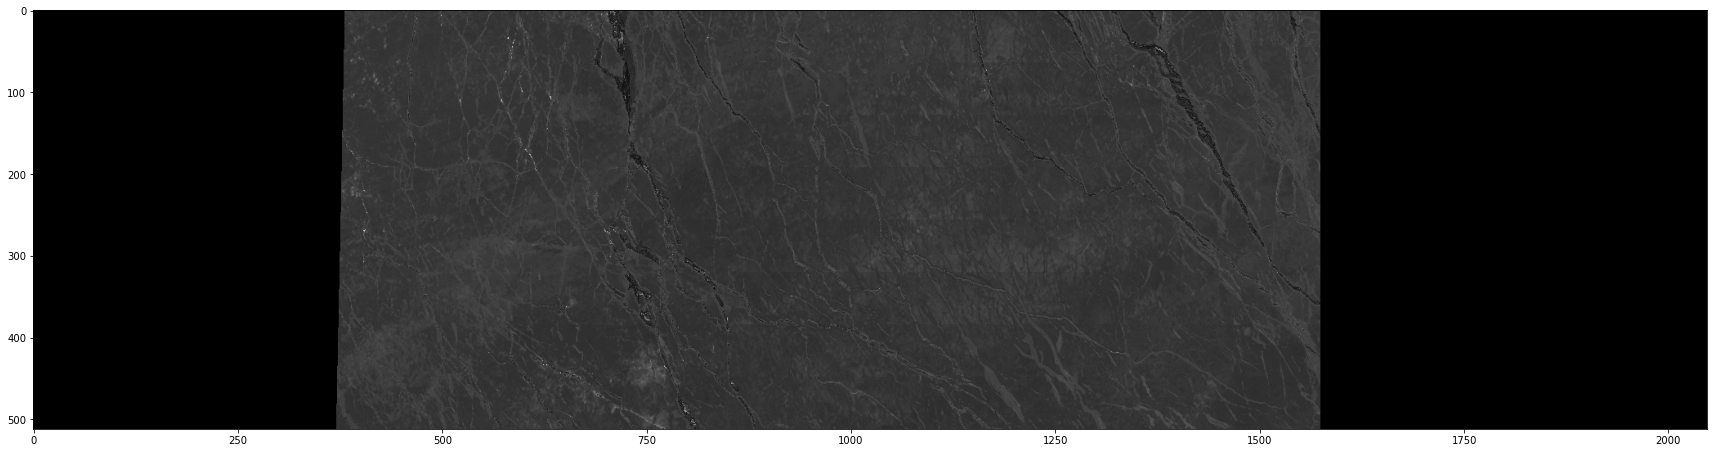

0

In [38]:
# plot roughness array

plot_here_and_write(misr_rough_2d_arr, trainingDS_dir)

In [39]:
# MVP with one line for lat-lon method

irow = 0

# find line/sample in the selected block
atm_line = atm_transect_in_block['line'].iloc[irow]
atm_sample = atm_transect_in_block['sample'].iloc[irow]
average_atm = atm_transect_in_block['mean_ATM_roughness'].iloc[irow]

atm_lat = atm_transect_in_block['lat'].iloc[irow]
atm_lon = atm_transect_in_block['lon'].iloc[irow]
if (atm_lon>180):
    atm_lon_west = atm_lon-360.0
    
print('%s, %s, %s, %s, %s' %(atm_line, atm_sample, average_atm, atm_lat, atm_lon_west))

0, 1198, 12.5075, 80.252996, -154.569723


In [40]:
# # extract MISR roughness based on single lat-lon

# atm_lat = 81.050398
# atm_lon = -152.181889 # should use ATM-lon West format

# abslat = np.abs(misr_lat_2d_arr - atm_lat) # element-wise
# abslon = np.abs(misr_lon_2d_arr - atm_lon) # element-wise

# abslon

# maximum = np.maximum(abslon, abslat)
# print(maximum)


# latlon_idx = np.argmin(maximum) # for flaten array and lat-lon
# print(latlon_idx)


# # extract MISR roughness w/lat-lon

# roughness_in_grid = misr_rough_2d_arr.flat[latlon_idx]
# roughness_in_grid


# line_atm = (latlon_idx/2048)
# print('line: %s' %line_atm)

# sample_atm = (line_atm%1)*2048
# print('sample: %s' %sample_atm)



# # extract MISR roughness w/line-sample

# rough = misr_rough_2d_arr[int(line_atm), int(sample_atm)]
# rough




In [41]:
# # plot lat-lon diffs

# plot_error_mesh(c)
# # plot_error_mesh(abslon)

## find <roughess.dat> files

In [42]:
# misr_roughness_in_pixel_list = [] do not use it anymore
plot_ds = []

for irow in range(atm_transect_in_block.shape[0]):

    # find line/sample and mean ATM in the selected block
    atm_line = atm_transect_in_block['line'].iloc[irow]
    atm_sample = atm_transect_in_block['sample'].iloc[irow]
    average_atm = atm_transect_in_block['mean_ATM_roughness'].iloc[irow]
#     print(atm_line, atm_sample)
    
    atm_lat = atm_transect_in_block['lat'].iloc[irow]
    atm_lon = atm_transect_in_block['lon'].iloc[irow]
    
    if (atm_lon>180):
        atm_lon_west = atm_lon-360.0
        


    # we find MISR L-S==pixel that ATM sample falls into it   
    misr_roughness_in_pixel_lineSample = misr_rough_2d_arr[atm_line, atm_sample]
    
#     misr_roughness_in_pixel_lineSample_up = misr_rough_2d_arr[atm_line-1, atm_sample]
#     misr_roughness_in_pixel_lineSample_down = misr_rough_2d_arr[atm_line+1, atm_sample]
#     misr_roughness_in_pixel_lineSample_before = misr_rough_2d_arr[atm_line, atm_sample-1]
#     misr_roughness_in_pixel_lineSample_after = misr_rough_2d_arr[atm_line, atm_sample+1]
#     misr_roughness_in_pixel_lineSample_up_before = misr_rough_2d_arr[atm_line-1, atm_sample-1]
#     misr_roughness_in_pixel_lineSample_up_after = misr_rough_2d_arr[atm_line-1, atm_sample+1]
#     misr_roughness_in_pixel_lineSample_down_before = misr_rough_2d_arr[atm_line+1, atm_sample-1]
#     misr_roughness_in_pixel_lineSample_down_after = misr_rough_2d_arr[atm_line+1, atm_sample+1]

    misr_neighborhood_ls = misr_roughness_in_pixel_lineSample
    
#     misr_neighborhood_ls = [misr_roughness_in_pixel_lineSample,
#                            misr_roughness_in_pixel_lineSample_up,
#                            misr_roughness_in_pixel_lineSample_down,
#                            misr_roughness_in_pixel_lineSample_before,
#                            misr_roughness_in_pixel_lineSample_after,
#                            misr_roughness_in_pixel_lineSample_up_before,
#                            misr_roughness_in_pixel_lineSample_up_after,
#                            misr_roughness_in_pixel_lineSample_down_before,
#                            misr_roughness_in_pixel_lineSample_down_after]
    
    misr_roughness_in_pixel_ls = np.mean(misr_neighborhood_ls)
    print('LS mean: %s' %misr_roughness_in_pixel_ls)
    
    #################################################################
    
    # find MISR pixels based on lat-lon
    abslat = np.abs(misr_lat_2d_arr - atm_lat) # element-wise
    abslon = np.abs(misr_lon_2d_arr - atm_lon_west) # element-wise, should use ATM lon West format here
    # 
    maximum = np.maximum(abslon, abslat)
    latlon_idx = np.argmin(maximum) # for flaten array and lat-lon
    
    
    # based on lat-lon
    misr_roughness_in_pixel_latlon_in_pixel = misr_rough_2d_arr.flat[latlon_idx]
    
    
#     misr_roughness_in_pixel_latlon_up = misr_rough_2d_arr.flat[latlon_idx-2048]
#     misr_roughness_in_pixel_latlon_down = misr_rough_2d_arr.flat[latlon_idx+2048]
#     misr_roughness_in_pixel_latlon_up_before = misr_rough_2d_arr.flat[latlon_idx-2048-1]
#     misr_roughness_in_pixel_latlon_up_after = misr_rough_2d_arr.flat[latlon_idx-2048+1]
#     misr_roughness_in_pixel_latlon_down_before = misr_rough_2d_arr.flat[latlon_idx+2048-1]
#     misr_roughness_in_pixel_latlon_down_after = misr_rough_2d_arr.flat[latlon_idx+2048+1]
#     misr_roughness_in_pixel_latlon_before = misr_rough_2d_arr.flat[latlon_idx-1]
#     misr_roughness_in_pixel_latlon_after = misr_rough_2d_arr.flat[latlon_idx+1]
    
    
    misr_neighborhood_latlon = [misr_roughness_in_pixel_latlon_in_pixel]
    
    
#     misr_neighborhood_latlon = [misr_roughness_in_pixel_latlon_in_pixel,\
#                          misr_roughness_in_pixel_latlon_up,\
#                          misr_roughness_in_pixel_latlon_down,\
#                          misr_roughness_in_pixel_latlon_up_before,\
#                          misr_roughness_in_pixel_latlon_up_after,\
#                          misr_roughness_in_pixel_latlon_down_before,\
#                          misr_roughness_in_pixel_latlon_down_after,\
#                          misr_roughness_in_pixel_latlon_before,\
#                          misr_roughness_in_pixel_latlon_after]
                         

    
#     print(misr_neighborhood)
    misr_roughness_in_pixel_latlon = np.mean(misr_neighborhood_latlon)
    print('latlon mean: %s' %misr_roughness_in_pixel_latlon)
    



#     c = np.maximum(abslon, abslat)
#     latlon_idx = np.argmin(c) # for flaten array
#     roughness_in_grid = misr_rough_2d_arr.flat[latlon_idx]
#     print(roughness_in_grid)
    
    # append predixted value to our list
    plot_ds.append((atm_line, atm_sample, atm_lat, atm_lon_west, average_atm, misr_roughness_in_pixel_ls, misr_roughness_in_pixel_latlon)) #roughness_in_grid))

#     if misr_roughness > 1:
#         misr_roughness_in_pixel_list.append(misr_roughness)
#     else:
#         print('MISR roughness in pixel: %s' %misr_roughness)
#         raise ValueError("why MISR roughness is negative for an ATM location? model error? or something else?")

plot_ds_colName = ['atm_lin', 'atm_sample', 'atm_lat', 'atm_lon_west', 'mean_ATM', 'misr_roughness_in_pixel_lineSample', 'misr_roughness_in_pixel_latlon']

print("\ntotal MISR-roughness pixels found: %s" %len(plot_ds))


LS mean: 19.135774622972736
latlon mean: 20.20557866361946
LS mean: 20.20557866361946
latlon mean: 19.135774622972736
LS mean: 20.73101205761994
latlon mean: 19.135774622972736
LS mean: 21.67677208842785
latlon mean: 20.523849097433764
LS mean: 20.523849097433764
latlon mean: 20.523849097433764
LS mean: 20.69347012975178
latlon mean: 22.056656966316268
LS mean: 22.056656966316268
latlon mean: 20.69347012975178
LS mean: 20.040332022037667
latlon mean: 20.69347012975178
LS mean: 24.552818072269798
latlon mean: 20.040332022037667
LS mean: 25.682807116887798
latlon mean: 25.682807116887798
LS mean: 23.04891590497147
latlon mean: 19.699146629156193
LS mean: 19.699146629156193
latlon mean: 19.699146629156193
LS mean: 19.353835777385843
latlon mean: 21.10383723057154
LS mean: 21.10383723057154
latlon mean: 19.353835777385843
LS mean: 19.944859566222746
latlon mean: 19.353835777385843
LS mean: 17.308158026070817
latlon mean: 19.944859566222746
LS mean: 17.547289411971448
latlon mean: 19.944859

latlon mean: 14.957278709387234
LS mean: 15.884046568296046
latlon mean: 15.884046568296046
LS mean: 15.1626866938639
latlon mean: 15.308715822088809
LS mean: 15.308715822088809
latlon mean: 15.308715822088809
LS mean: 15.248366884080527
latlon mean: 15.20080002413875
LS mean: 15.20080002413875
latlon mean: 15.248366884080527
LS mean: 15.286327058331578
latlon mean: 15.248366884080527
LS mean: 15.242878702947484
latlon mean: 15.286327058331578
LS mean: 15.17259672328791
latlon mean: 15.17259672328791
LS mean: 15.024514880810942
latlon mean: 15.512784763241957
LS mean: 15.512784763241957
latlon mean: 15.512784763241957
LS mean: 15.351637541112977
latlon mean: 16.168275454358664
LS mean: 16.168275454358664
latlon mean: 15.351637541112977
LS mean: 15.33390347478689
latlon mean: 15.351637541112977
LS mean: 15.131035764598282
latlon mean: 15.33390347478689
LS mean: 15.159008585315794
latlon mean: 15.33390347478689
LS mean: 15.185451990806554
latlon mean: 15.41266984447237
LS mean: 15.412669

latlon mean: 11.270890304498195
LS mean: 14.421895226045612
latlon mean: 15.166343056980732
LS mean: 15.166343056980732
latlon mean: 14.421895226045612
LS mean: 16.193848590042343
latlon mean: 14.421895226045612
LS mean: 27.488717972626105
latlon mean: 16.193848590042343
LS mean: 16.25325176740823
latlon mean: 16.193848590042343
LS mean: 14.47575936031474
latlon mean: 14.176970455685248
LS mean: 14.176970455685248
latlon mean: 14.176970455685248
LS mean: 12.3660279957947
latlon mean: 13.341131181826729
LS mean: 13.341131181826729
latlon mean: 13.341131181826729
LS mean: 21.253051919101374
latlon mean: 21.002765538232126
LS mean: 21.002765538232126
latlon mean: 21.253051919101374
LS mean: 16.629479576583787
latlon mean: 21.253051919101374
LS mean: 26.4545761948096
latlon mean: 16.629479576583787
LS mean: 12.05233962229064
latlon mean: 16.629479576583787
LS mean: 11.917958283076675
latlon mean: 10.609435282811791
LS mean: 10.609435282811791
latlon mean: 10.609435282811791
LS mean: 11.403

latlon mean: 16.822583141465262
LS mean: 16.822583141465262
latlon mean: 16.822583141465262
LS mean: 21.079775895009316
latlon mean: 17.642203762189933
LS mean: 17.642203762189933
latlon mean: 21.079775895009316
LS mean: 19.323163831563228
latlon mean: 21.079775895009316
LS mean: 16.669686153330858
latlon mean: 19.323163831563228
LS mean: 19.78958200873132
latlon mean: 19.323163831563228
LS mean: 25.04283182196657
latlon mean: 20.14997448791514
LS mean: 20.14997448791514
latlon mean: 20.14997448791514
LS mean: 23.945359726870578
latlon mean: 19.80369273850791
LS mean: 19.80369273850791
latlon mean: 19.80369273850791
LS mean: 25.53601457693279
latlon mean: 20.521746635562717
LS mean: 20.521746635562717
latlon mean: 25.53601457693279
LS mean: 22.049863776542427
latlon mean: 25.53601457693279
LS mean: 21.870208020655518
latlon mean: 22.281874621502926
LS mean: 22.281874621502926
latlon mean: 22.281874621502926
LS mean: 23.302983269029532
latlon mean: 21.16940343366649
LS mean: 21.16940343

latlon mean: 15.638766370645293
LS mean: 14.842483332860645
latlon mean: 17.827855530244136
LS mean: 17.827855530244136
latlon mean: 17.827855530244136
LS mean: 14.741147982283065
latlon mean: 19.128265161690187
LS mean: 19.128265161690187
latlon mean: 14.741147982283065
LS mean: 15.691264215148173
latlon mean: 14.741147982283065
LS mean: 18.111052634570772
latlon mean: 15.691264215148173
LS mean: 17.367046673434604
latlon mean: 15.691264215148173
LS mean: 17.325963063848228
latlon mean: 20.30208334446697
LS mean: 20.30208334446697
latlon mean: 20.30208334446697
LS mean: 18.40063842440762
latlon mean: 22.467703026977073
LS mean: 22.467703026977073
latlon mean: 18.40063842440762
LS mean: 19.842266261682315
latlon mean: 18.40063842440762
LS mean: 21.213823975861203
latlon mean: 19.842266261682315
LS mean: 19.5791780954473
latlon mean: 19.842266261682315
LS mean: 15.9447251467085
latlon mean: 20.82335938559617
LS mean: 20.82335938559617
latlon mean: 20.82335938559617
LS mean: 15.480710668

latlon mean: 17.305530299432238
LS mean: 16.77320527347637
latlon mean: 16.54951698171442
LS mean: 16.54951698171442
latlon mean: 16.54951698171442
LS mean: 17.952732798717523
latlon mean: 21.710804124771833
LS mean: 21.710804124771833
latlon mean: 21.710804124771833
LS mean: 20.268939688652058
latlon mean: 17.952732798717523
LS mean: 18.45163910267532
latlon mean: 20.268939688652058
LS mean: 17.70558643822781
latlon mean: 20.268939688652058
LS mean: 16.33432017859731
latlon mean: 16.33432017859731
LS mean: 16.391481353160245
latlon mean: 19.065969116254752
LS mean: 19.065969116254752
latlon mean: 19.065969116254752
LS mean: 18.870787706198264
latlon mean: 19.41506145261261
LS mean: 19.41506145261261
latlon mean: 18.870787706198264
LS mean: 18.69746988522944
latlon mean: 20.504869000673885
LS mean: 20.504869000673885
latlon mean: 18.69746988522944
LS mean: 12.960044221438563
latlon mean: 18.69746988522944
LS mean: 19.42998661317023
latlon mean: 12.960044221438563
LS mean: 13.9856437692

In [43]:
plot_ds_colName

['atm_lin',
 'atm_sample',
 'atm_lat',
 'atm_lon_west',
 'mean_ATM',
 'misr_roughness_in_pixel_lineSample',
 'misr_roughness_in_pixel_latlon']

In [44]:
# plot_ds

In [45]:
atm_transect_in_block.columns

Index(['path', 'orbit', 'block', 'line', 'sample', 'lat', 'lon', ' an', ' ca',
       ' cf', 'mean_ATM_roughness', ' weight', ' npts', ' cloud', ' var'],
      dtype='object')

In [46]:
# # build a single DF from both ATM and MISR lists and add "misr_roughness_in_pixel_list" to it

# atm_transect_in_block['MISR-roughness'] = misr_roughness_in_pixel_list
# atm_transect_in_block.columns

In [47]:
# # remove negative values from DF

# negative_misr_index_list = atm_transect_in_block.loc[atm_transect_in_block['MISR-roughness'] < 0].index
# print("size of list before removing negative MISR-rough data: %s" %len(atm_transect_in_block))
# atm_transect_in_block.drop(negative_misr_index_list, axis='index', inplace=True)
# print("size of list after removing negative MISR-rough data: %s" %len(atm_transect_in_block))


In [48]:
# row_count = atm_transect_in_block.shape[0]
# row_count

In [49]:
# build a dataframe from list

plot_df = pd.DataFrame(plot_ds, columns=plot_ds_colName)
plot_df['misr_roughness_in_pixel_latlon'].head(10)

0    20.205579
1    19.135775
2    19.135775
3    20.523849
4    20.523849
5    22.056657
6    20.693470
7    20.693470
8    20.040332
9    25.682807
Name: misr_roughness_in_pixel_latlon, dtype: float64

In [50]:
# remove -1 from dataset

remove_negatives(plot_df, 'misr_roughness_in_pixel_latlon')
# plot_df

size of list before removing negative MISR-rough data: 812
size of list after removing negative MISR-rough data: 811


0

## plot transect

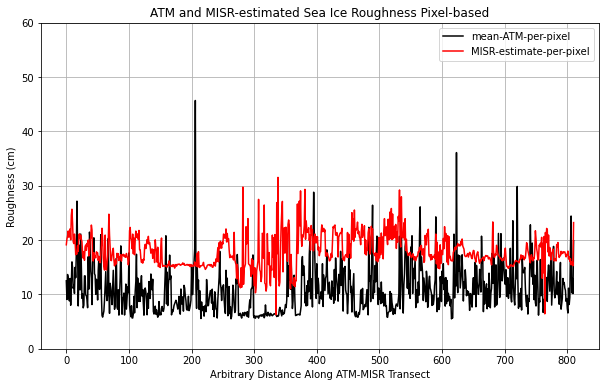

In [51]:
# plot based on line-sample

x= range(plot_df.shape[0])

fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(x, plot_df['mean_ATM'], color='black', label='mean-ATM-per-pixel')
ax.plot(x, plot_df['misr_roughness_in_pixel_lineSample'], color='red', label='MISR-estimate-per-pixel')

# Same as above
ax.set_ylim([0, 60])
ax.set_xlabel('Arbitrary Distance Along ATM-MISR Transect')
ax.set_ylabel('Roughness (cm)')
ax.set_title('ATM and MISR-estimated Sea Ice Roughness Pixel-based')
ax.grid(True)
ax.legend(loc='upper right');

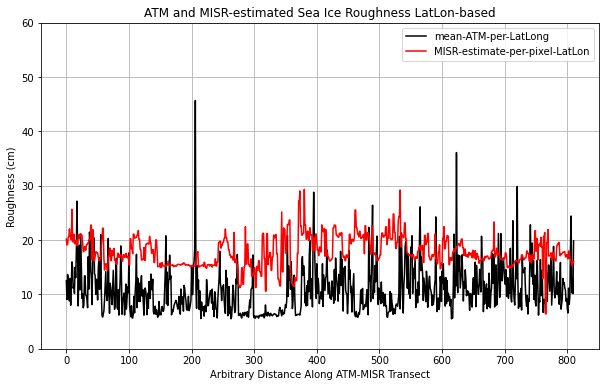

In [52]:
# plot based on lat-lon

x= range(plot_df.shape[0])

fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(x, plot_df['mean_ATM'], color='black', label='mean-ATM-per-LatLong')
ax.plot(x, plot_df['misr_roughness_in_pixel_latlon'], color='red', label='MISR-estimate-per-pixel-LatLon')

# Same as above
ax.set_ylim([0, 60])
ax.set_xlabel('Arbitrary Distance Along ATM-MISR Transect')
ax.set_ylabel('Roughness (cm)')
ax.set_title('ATM and MISR-estimated Sea Ice Roughness LatLon-based')
ax.grid(True)
ax.legend(loc='upper right');

In [53]:
# plot both ATM lines together to make sure the look the same



In [54]:
# # x = range(len(misr_roughness_in_pixel_list))
# x= range(row_count)

# fig, ax = plt.subplots(figsize=(10, 6))

# # Specify how our lines should look
# ax.plot(x, atm_transect_in_block['mean_ATM_roughness'], color='black', label='mean-ATM-per-pixel')
# ax.plot(x, atm_transect_in_block['MISR-roughness'], color='red', label='MISR-estimated-per-pixel')

# # Same as above
# ax.set_xlabel('Arbitrary Distance Along ATM-MISR Transect')
# ax.set_ylabel('Roughness (cm)')
# ax.set_title('ATM and MISR-estimated Sea Ice Roughness')
# ax.grid(True)
# ax.legend(loc='upper right');

In [53]:
bin_size = 20

## histogram of transect

Text(0.5, 1.0, 'Histogram')

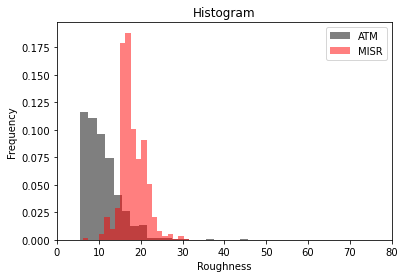

In [54]:
plt.hist(plot_df['mean_ATM'], density=True, bins=bin_size, label='ATM', color='black', alpha=0.5)  # density=False would make counts
plt.hist(plot_df['misr_roughness_in_pixel_lineSample'], density=True, bins=bin_size, label='MISR', color='red', alpha=0.5)  # density=False would make counts
plt.xlim(0,80)

plt.xlabel('Roughness')
plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.title("Histogram")


Text(0.5, 1.0, 'Histogram')

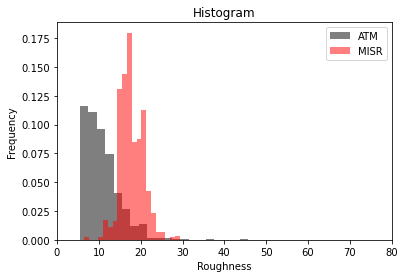

In [55]:
plt.hist(plot_df['mean_ATM'], density=True, bins=bin_size, label='ATM', color='black', alpha=0.5)  # density=False would make counts
plt.hist(plot_df['misr_roughness_in_pixel_latlon'], density=True, bins=bin_size, label='MISR', color='red', alpha=0.5)  # density=False would make counts
plt.xlim(0,80)

plt.xlabel('Roughness')
plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.title("Histogram")


## statistics of transect

In [56]:
# describe the statistics

atm_transect_in_block['mean_ATM_roughness'].describe()

count    812.000000
mean      10.809810
std        4.267432
min        5.510000
25%        7.726786
50%       10.074798
75%       12.947333
max       45.680000
Name: mean_ATM_roughness, dtype: float64

In [57]:
# change list to DF

# misr_roughness_in_pixel_df = pd.DataFrame(misr_roughness_in_pixel_list, columns=['rms'])

In [58]:
atm_transect_in_block['MISR-roughness'].describe()

KeyError: 'MISR-roughness'

## now calculate histogram and statistics for the whole BOX

In [ ]:
misr_roughness_in_pixel_list_box = find_misr_roughness_per_pixel(atm_transect_small)

In [ ]:
# build a single DF from both ATM and MISR lists and add "misr_roughness_in_pixel_list" to it

atm_transect_small['MISR-roughness'] = misr_roughness_in_pixel_list_box
atm_transect_small.columns

In [ ]:
# # remove negative values from DF

# negative_misr_index_list_box = atm_transect_small.loc[atm_transect_small['MISR-roughness'] < 0].index
# print("size of list before removing negative MISR-rough data: %s" %len(atm_transect_small))

# atm_transect_small.drop(negative_misr_index_list_box, axis='index', inplace=True)
# print("size of list after removing negative MISR-rough data: %s" %len(atm_transect_small))


## plot histogram for BOX

In [ ]:
hist_bounds = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]
n, bins, bounds=plt.hist(atm_transect_small['mean_ATM_roughness'], density=True, bins=hist_bounds, label='ATM', color='black', alpha=0.5)  # density=False would make counts
plt.hist(atm_transect_small['MISR-roughness'], density=True, bins=hist_bounds, label='MISR', color='red', alpha=0.5)  # density=False would make counts

plt.xticks(bins)
plt.xlabel('Roughness')
# plt.xticks(range(10))

plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.title("ATM vs. MISR for %s" %sim_month)


In [ ]:
# describe ATM statistics of BOX

atm_transect_small['mean_ATM_roughness'].describe()

In [ ]:
# describe MISR statistics of BOX

atm_transect_small['MISR-roughness'].describe()

In [ ]:
# April- good

# selected_path = 122
# selected_orbit = 86891
# selected_block = 19